<a href="https://colab.research.google.com/github/ObjectMatrix/google-colab-notebook/blob/main/world_simplest_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Open in Colab](https://colab.research.google.com/world-simplest-llm.ipynb.ipynb)


In [ ]:
!pip install -U tensorflow
!pip install numpy

Data Preparation:

The data variable contains the input text that will be used to train the Language Model.
The unique characters in the text are extracted and stored in the chars list.
num_chars represents the total number of unique characters in the text.
char_to_index is a dictionary that maps each character to a unique index.
index_to_char is a dictionary that maps each index back to its corresponding character.
sequence_length determines the number of characters in each input sequence.
Model Creation:

A sequential model is created using Keras.
An LSTM (Long Short-Term Memory) layer is a type of recurrent neural network (RNN) layer that is commonly used for sequence modeling tasks. It is designed to address the vanishing gradient problem that can occur when training deep neural networks on long sequences.) layer is added to the model with 32 units. It takes input of shape (sequence_length, 1) representing the sequence of characters.
A dense layer with num_chars units and a softmax activation function is added to output the probabilities of the next character.
Model Training:

The model is trained using the prepared data (X and y).
X represents the input sequences, reshaped to (num_sequences, sequence_length, 1) to match the model's input shape.
y represents the target values, one-hot encoded to match the model's output shape.
The model is trained using the categorical_crossentropy loss function and the Adam optimizer.
Text Generation:

A random start_index is selected within the range of the original data.
generated_text is initialized with a substring of the original data based on the start_index.
The loop iterates 50 times (you can modify this number as per your requirement).
For each iteration, the current generated_text is reshaped and normalized.
The model predicts the probabilities of the next character.
The character with the highest probability (result) is added to generated_text.
The first character of generated_text is removed to maintain the desired sequence length.
The generated characters are appended to generated_text_result to accumulate the generated text.
Print Generated Text:

After the loop completes, generated_text_result is printed, which represents the generated text.
Please note that this is a basic character-level Language Model, and the generated text may not always be meaningful or coherent. Building more advanced and sophisticated Language Models often involves using larger datasets, more complex architectures, and additional techniques like word-level modeling or fine-tuning on specific tasks.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 1: Data Preparation
data = "Hello, how are you? I am doing great."
chars = list(set(data))
num_chars = len(chars)
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}
sequence_length = 20

X = []
y = []
for i in range(len(data) - sequence_length):
    sequence_in = data[i : i + sequence_length]
    sequence_out = data[i + sequence_length]
    X.append([char_to_index[char] for char in sequence_in])
    y.append(char_to_index[sequence_out])

X = np.reshape(X, (len(X), sequence_length, 1))
X = X / float(num_chars)
y = np.eye(num_chars)[y]

# Step 2: Model Creation
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(num_chars, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam")

# Step 3: Model Training
model.fit(X, y, epochs=100, batch_size=16)

# Step 4: Text Generation
start_index = np.random.randint(0, len(data) - sequence_length)
generated_text = data[start_index : start_index + sequence_length]
generated_text_result = generated_text

for _ in range(50):
    x = np.reshape([char_to_index[char] for char in generated_text], (1, sequence_length, 1))
    x = x / float(num_chars)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = index_to_char[index]
    generated_text += result
    generated_text = generated_text[1:]

    generated_text_result += result

print("Generated Text:", generated_text_result)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 1: Data Preparation
data = "Hello, how are you? I am doing great."
chars = list(set(data))
num_chars = len(chars)
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}
sequence_length = 10

X = []
y = []
for i in range(len(data) - sequence_length):
    sequence_in = data[i : i + sequence_length]
    sequence_out = data[i + sequence_length]
    X.append([char_to_index[char] for char in sequence_in])
    y.append(char_to_index[sequence_out])

X = np.reshape(X, (len(X), sequence_length, 1))
X = X / float(num_chars)
y = np.eye(num_chars)[y]

# Step 2: Model Creation
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(num_chars, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam")

# Print the model summary
model.summary()


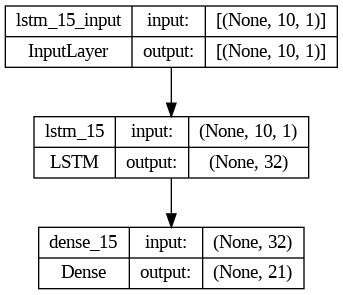

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils.vis_utils import plot_model

# Step 1: Data Preparation
data = "Hello, how are you? I am doing great."
chars = list(set(data))
num_chars = len(chars)
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}
sequence_length = 10

X = []
y = []
for i in range(len(data) - sequence_length):
    sequence_in = data[i : i + sequence_length]
    sequence_out = data[i + sequence_length]
    X.append([char_to_index[char] for char in sequence_in])
    y.append(char_to_index[sequence_out])

X = np.reshape(X, (len(X), sequence_length, 1))
X = X / float(num_chars)
y = np.eye(num_chars)[y]

# Step 2: Model Creation
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(num_chars, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam")

# Save the model visualization as a PNG file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
